# Regression and Model Selection

## Classic Curve Fitting and Linear Regression

Given a set of inputs and associated outputs, we want to build a system that will fit some set of input data, $A$, to another set of data, $b$, using a model $x$ with some set of variables. Many of these issues map to the following equation/transformation.

$$
Ax = b
$$

We look at evaluating how effective a model is and identifying **Over-** and **Under-determined systems**.

### Over-Determined Systems

In Over-Determined systems, $Ax=b$ cannot directly be satisfied to the set of equations, in many cases, this occurs when there are few variables avaliable to fit the data. So we may want to look at minimizing $Ax-b$ with a penalizing regularizer, $g(x)$ on the solution.

$$
\underset{x}{\operatorname{argmin}} \left( ||Ax-b||_2 + \lambda g(x)\right)
$$

with regularizer $g(x)$

### Under-Determined Systems

In Under-Determined systems there are typically many variables but very few constraints providing for potentially an infinite number of possible solutions. In these cases, an objective function, $g(x)$ is imposed as an additional target contraint while satisfying a viable solution. The solution may also be relaxed to be less than some $\epsilon$ to meet the objective function. 

$$
\underset{x}{\operatorname{argmin}} g(x) \text{ where } ||Ax-b||_2 \leq \epsilon
$$

with regularization term $||Ax-b||_2$ and objective function $g(x)$.

## Non-Linear Regression

### Over-Determined Systems

$$
\underset{x}{\operatorname{argmin}} \left( f(A, x, b) + \lambda g(x)\right)
$$

with regularizer $g(x)$ and objective function $f$.

### Under-Determined Systems

$$
\underset{x}{\operatorname{argmin}} g(x) \text{ where } f(A, x, b) \leq \epsilon
$$

with regularization term $f(A, x, b)$ and objective function $g(x)$.

# Over-fitting and Under-fitting

In the case where as the model complexity increases (number of parameters increases), Over-fitting is more likely to occur where error on training data will go to zero, but does not reflect well on the withhold data as a.

In the case of Under-fitting, the model and/or data cannot reflect well and levels out.

The case of Over-fitting generally occurs more often than underfitting.

![over-under-fitting](graphics/Over-Under-Fitting.png "Over-Under-Fitting")

# To Summarize

Over-fitting/Under determined systems:
- Too many solutions, few unknowns
- Apply additional constraints (regularizers)

Under-fitting/Over determined systems
- No solutions, too many constraints to satisify
- Attempt to minimize error

---

Optimizations:

- Regularization + Optimization
  - Objective Function:
    - The model we want to fit whose error we want to minimize
  - Regularizations:
    - Solution type we want

---

![OverDetermined](./graphics/OverDetermined.png)

![UnderDetermined](./graphics/UnderDetermined.png)

# Overdetermined

Let's consider an objective function and regularization example. Here there are no solutions but we can minimize the error.

$$
\underset{x}{\operatorname{argmin}} \left( ||Ax-b||_2 + \lambda_1 ||x||_1 + \lambda_2 ||x||_2\right)
$$

The objective function, the L2-Norm in this case:

$$
||Ax-b||_2
$$

The Regularizer, a portion of $x$ in the L1-Norm and another portion in the L2-Norm:

$$
\lambda_1 ||x||_1 + \lambda_2 ||x||_2
$$

- L2-Norm is the standard in Least-squares fitting
- L1-Norm typically promotes sparsity in parameters (typically LASSO)
- $\lambda$ weights L1 or L2-Norm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams

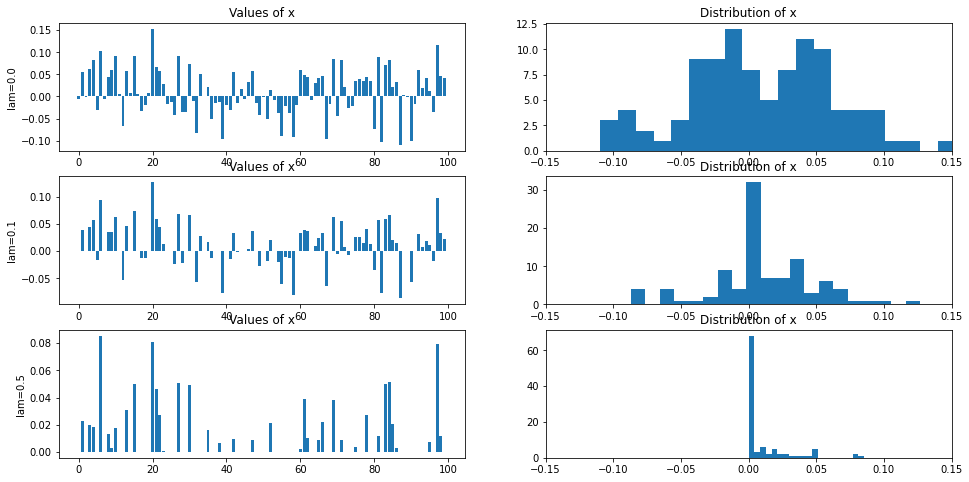

In [10]:
# Overdetermined
n = 500
m = 100
A = np.random.rand(n, m) # 500 x 100
b = np.random.rand(n)   # 500 x 1

xdag = np.linalg.pinv(A)@b
lam = np.array([0, 0.1, 0.5])

# add L1-Norm
def reg_norm(x, A, b, lam):
    return np.linalg.norm(A@x-b, ord=2) + lam * np.linalg.norm(x, ord=1)

fig = plt.figure(figsize=(16,8))
axs = fig.subplots(len(lam), 2)
for j in range(len(lam)):
    res = minimize(reg_norm, args=(A, b, lam[j]), x0=xdag)
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,0].set_title('Values of x')
    
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)
    axs[j,1].set_title('Distribution of x')

Note the sparsity of $x$ values as the influence of L1-Norm is increased by $\lambda$. The L1-Norm (LASSO) are used typically to find which element in a vector have the most contribution to the outcome.

# Underdetermined

Let's consider an objective function and regularization example. Here we have an infinite number of solutions.

$$
\underset{x}{\operatorname{argmin}} \left( \lambda_1 ||x||_1 + \lambda_2 ||x||_2\right) \text{ subject to } Ax = b
$$

The objective function, a portion of $x$ in the L1-Norm and another portion in the L2-Norm:

$$
\lambda_1 ||x||_1 + \lambda_2 ||x||_2
$$

The Regularizer, to be satisfied is simply:

$$
Ax = b
$$

since this can be easily satisfied, or

$$
|Ax-b| < \epsilon
$$

if meeting the criteria of being exactly equal not as important.

- L2-Norm is the standard in Least-squares fitting
- L1-Norm typically promotes sparsity in parameters (typically LASSO)
- $\lambda$ weights L1 or L2-Norm

In [7]:
# Underdetermined
n = 20
m = 100
A = np.random.rand(n, m)
b = np.random.rand(n)

# L2-Norm
def two_norm(x):
    return np.linalg.norm(x,ord=2)

constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)
res = minimize(two_norm, x0, method='SLSQP', constraints=constr)
x2 = res.x

# L1-Norm
def one_norm(x):
    return np.linalg.norm(x,ord=1)

res = minimize(one_norm, x0, method='SLSQP', constraints=constr)
x1 = res.x

Text(0.5, 1.0, 'Distribution in the L1-Norm')

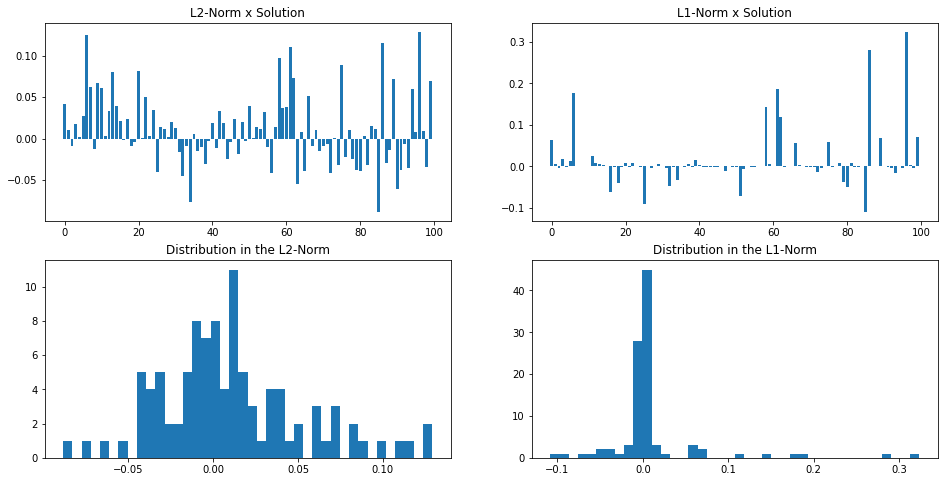

In [13]:
fig = plt.figure(figsize=(16,8))
axs = fig.subplots(2, 2)
axs = axs.reshape(-1)

axs[0].bar(range(m), x2)
axs[0].set_title('L2-Norm x Solution')

axs[1].bar(range(m), x1)
axs[1].set_title('L1-Norm x Solution')

axs[2].hist(x2, 40)
axs[2].set_title('Distribution in the L2-Norm')

axs[3].hist(x1, 40)
axs[3].set_title('Distribution in the L1-Norm')